# Исследование модели Эрдеша-Реньи на соответствие модели веб-графа

### Задание 1
Построить случайный граф в соответствии с моделью Эрдеша-Реньи (N = 1000 вершин, p = 0.003). Построить график распределения вершин в log-log координатах для проверки соответствия степенному закону.

In [15]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import pylab
from collections import Counter

matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
%matplotlib inline
pylab.rcParams['figure.figsize'] = 8, 8

In [2]:
G = nx.gnp_random_graph(1000, 0.003)

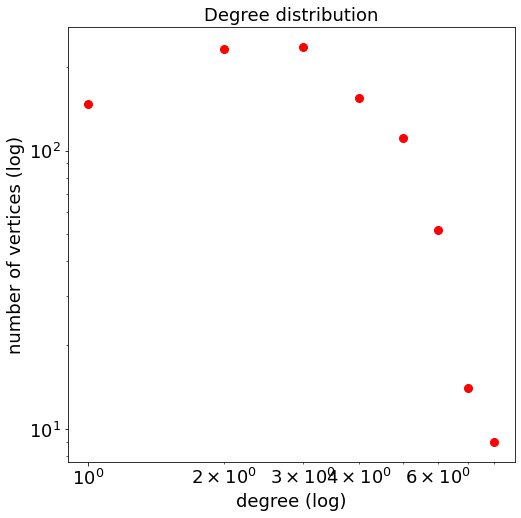

In [3]:

degrees = Counter(dict(nx.degree(G)).values())
sorted_degree_values = sorted(degrees.keys())
counts = [degrees[degree] for degree in sorted_degree_values]

plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8)

plt.xlabel("degree (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("Degree distribution", fontsize=18)
plt.show()

Вывод: степенной закон распределения степеней не наблюдается (график не приближаем линейной функцией); поэтому модель Эрдеша-Реньи не подходит для описания веб-графов.

### Задание 2
1. Определить количество компонент в графе модели Эрдеша-Реньи.
2. Удалить вершины с вероятностью p' = 0.1. Узнать, останется ли гигантская компонента.
3. Удалить из исходного графа 100 вершин с максимальными степенями. Узнать, останется ли гигантская компонента.

In [4]:
import random

In [5]:
def print_features(graph):
    print(nx.number_connected_components(graph), "connected components\n")
    
    print("Giant component:")
    giant_component = max([graph.subgraph(g) for g in nx.connected_components(graph)], key=len)
    print(giant_component.order(), "nodes")
    print("diameter", nx.diameter(giant_component))

In [6]:
print("Исходный граф:\n")
print_features(G)

Исходный граф:

52 connected components

Giant component:
942 nodes
diameter 15


In [7]:
H = G.copy()

print("После удаления вершин с вероятностью p' = 0.1:\n")

for node in G.nodes():
    if random.random() < 0.1:
        H.remove_node(node)

print_features(H)

После удаления вершин с вероятностью p' = 0.1:

66 connected components

Giant component:
828 nodes
diameter 17


In [8]:
H = G.copy()

print("После удаления 100 вершин максимальной степени:\n")

nodes_sorted_by_degree = sorted(H.nodes(), key=lambda node: H.degree(node), reverse=True)
for node in nodes_sorted_by_degree[:100]:
    H.remove_node(node)

print_features(H)

После удаления 100 вершин максимальной степени:

104 connected components

Giant component:
761 nodes
diameter 24


Вывод: гигантская компонента при обеих атаках сохраняется; то есть модель Эрдеша-Реньи устойчива как к случайным атакам, так и к атакам на хабы.

### Задание 3
Дан граф в виде файла 1.graph.txt.
Требуется найти оптимальные параметры для степенного закона для распределения степеней вершин.

In [9]:
from collections import defaultdict
from collections import Counter

In [10]:
file = "files/task_1/1.graph.txt"
G = nx.read_edgelist(file)

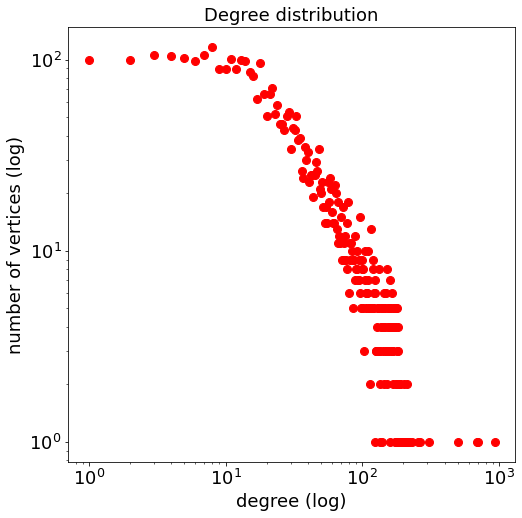

In [11]:
degrees = Counter(dict(nx.degree(G)).values())
sorted_degree_values = sorted(degrees.keys())
counts = [degrees[degree] for degree in sorted_degree_values]

plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8)

plt.xlabel("degree (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("Degree distribution", fontsize=18)
plt.show()

In [12]:
from scipy.optimize import curve_fit
import numpy as np

def func(degree, constant, gamma):
    return float(constant) / (degree ** gamma)

h1, h2 = 8, 150
xdata = np.array(sorted_degree_values[h1:h2])
ydata = np.array(counts[h1:h2])

popt, pcov = curve_fit(func, xdata, ydata)
constant, gamma = popt

In [13]:
print("Constant:", constant)
print("Gamma:", gamma)

Constant: 1155.4756831027912
Gamma: 1.010850458111805


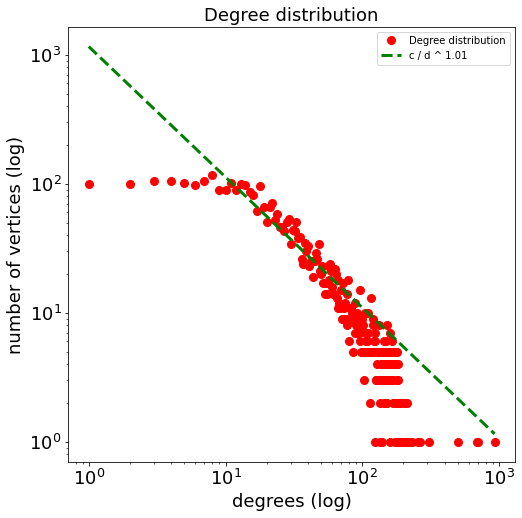

In [14]:
plt.loglog(sorted_degree_values, counts, ls='None', marker='o', color='r', markersize=8,
           label="Degree distribution")
estimated = [func(degree, constant, gamma) for degree in sorted_degree_values]
plt.loglog(sorted_degree_values,
           estimated,
           ls='--', color='g', linewidth=3, label=u"c / d ^ %.2f" % gamma)

plt.xlabel("degrees (log)", fontsize=18)
plt.ylabel("number of vertices (log)", fontsize=18)
plt.title("Degree distribution", fontsize=18)
plt.legend()
plt.show()

Вывод: этот фрагмент сложной сети соответствует степенному закону для распределения степеней вершин.